Start of the Neural Network

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib as mpl


In [3]:
from tensorflow import keras

In [4]:
dfs = []
for year in range(2000, 2011):
    dfs.append(pd.read_csv(f'{year}.csv'))
df = pd.concat(dfs)
df = df.sort_values(by='popularity', ascending=False)
top50 = df.iloc[:50]
len(df)
#df = df.drop('id', axis = 1)

11000

In [5]:
df

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,3AJwUDP919kvQ9QcozQPxg,90,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773,4
0,7lQ8MOhq6IN2w8EYcFNSUk,88,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.237,0.662,112.238,290320,4
3,561jH07mF1jHuk7KlaeF0s,88,0.637,0.678,0,-3.798,1,0.2660,0.20900,0.000000,0.156,0.254,84.039,250760,4
0,0JXXNGljqupsJaZsgSbMZV,88,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.191,0.498,81.001,195373,4
0,4EWCNWgDS8707fNSZ1oaA5,87,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.248,0.654,87.999,211000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1esj1LFgfyFRbU5brtALfE,41,0.530,0.870,7,-6.488,1,0.0936,0.01460,0.000007,0.367,0.735,147.877,205253,4
995,2gdPoGz36VlwTB8SQCinWl,41,0.410,0.791,7,-6.989,1,0.0583,0.28500,0.000518,0.872,0.473,144.035,256693,4
931,0vg3uOKR9IEaaPXl4zGw1G,41,0.723,0.148,2,-19.922,1,0.0407,0.63100,0.004190,0.115,0.204,129.097,182467,4
864,5Ca1kI9DGC9tjH7Yth2OPY,41,0.659,0.651,7,-7.424,1,0.0372,0.69400,0.000000,0.706,0.969,118.776,152893,3


In [30]:
print(df.head())
from requests import get, post
#Get access token if needed
# url = 'https://accounts.spotify.com/api/token'
# headers = {'Content-Type': 'application/x-www-form-urlencoded'}
# body = {'grant_type': 'client_credentials', 'client_id': "c704a041594444eda9dcf53699cc22cd", 'client_secret': "99d731b2cf3641a5a08bc0f2444868f9"}
# res = post(url, headers=headers, data=body)
# print(res.json())

# for num in range(0, 201, 50):
#     ids = ",".join(set200[num:num+50])
#     res = get(f'https://api.spotify.com/v1/tracks/?market=US&{ids}', headers=headers).json()
#     print(res)
#     tracknames = []
#     for track in res.json()['tracks']:
#         tracknames.append(track['name'])
# df['track names'] = tracknames

import requests
import json

# Replace 'your_access_token' with your Spotify API access token
access_token = 'BQB-BDM2VSKbFnSYSPVEswZaYI5MFcEwsFPThk5s8RWFw1eXZ34IqMLi0TK8bg8GrMlijGGncxlkKAsUfnD0d03DPRdF3KzbxW59u8NwXrDvlZqAlLU'

# Your list of 200 track IDs
track_ids = top50['id'].tolist()
print(track_ids)

# Split the list into chunks of 50, as Spotify's API has a limit of 50 IDs per request

# Iterate over each chunk and make a request to the Spotify API
    # Join the track IDs into a comma-separated string
ids = ','.join(track_ids)

# Set up the headers for the request
headers = {
    'Authorization': f'Bearer {access_token}',
    'Accept': 'application/json',
    'Content-Type': 'application/json'
}

# Make the request to the Spotify API
response = requests.get(f'https://api.spotify.com/v1/tracks?ids={ids}', headers=headers)

# Check for a valid response
if response.status_code == 200:
    # Parse the JSON response
    tracks_data = response.json()
    # Do something with the tracks data...
    print(json.dumps(tracks_data, indent=2))
else:
    print(f'Failed to retrieve tracks: {response.status_code} - {response.text}')
    
tracknames = []
for track in tracks_data['tracks']:
    tracknames.append(track['name'])
print(tracknames)

                       id  popularity  danceability  energy  key  loudness  \
1  3AJwUDP919kvQ9QcozQPxg          90         0.429   0.661   11    -7.227   
0  7lQ8MOhq6IN2w8EYcFNSUk          88         0.908   0.669    7    -2.827   
3  561jH07mF1jHuk7KlaeF0s          88         0.637   0.678    0    -3.798   
0  0JXXNGljqupsJaZsgSbMZV          88         0.684   0.607   11    -8.127   
0  4EWCNWgDS8707fNSZ1oaA5          87         0.790   0.647   10    -5.983   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
1     1       0.0281       0.00239          0.000121     0.234    0.285   
0     1       0.0738       0.00286          0.000000     0.237    0.662   
3     1       0.2660       0.20900          0.000000     0.156    0.254   
0     0       0.1000       0.02670          0.000307     0.191    0.498   
0     0       0.1360       0.05150          0.000000     0.248    0.654   

     tempo  duration_ms  time_signature  
1  173.372       266773               

In [32]:
top50["tracknames"] = tracknames

/var/folders/zy/wrkqwd515vjd_t28lnvhkxkw0000gn/T/ipykernel_40860/753063057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50["tracknames"] = tracknames


In [6]:
pd.set_option('display.max_rows', 200)

In [10]:
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
shuffled_df[0:200]

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3Zwu2K0Qa5sT6teCCHPShP,80,0.459,0.89100,10,-5.057,0,0.0623,0.005110,0.000000,0.1060,0.5880,154.837,203507,4
1,7wL7Lb8Q3aYyq6gmRL0PZq,56,0.418,0.44700,0,-9.058,0,0.3380,0.684000,0.000002,0.4140,0.8690,169.336,81787,4
2,47SJcoi329tD5TwD6m9CJ4,54,0.557,0.90500,11,-4.506,1,0.2670,0.010400,0.000000,0.1110,0.7990,160.013,244693,4
3,2ZLL9Blx7Tq4tBrhE9YvXE,59,0.693,0.52800,7,-10.854,1,0.0366,0.068200,0.001420,0.6770,0.9100,145.176,222107,4
4,2QcUxndr7skMMHLElnl4Bo,62,0.734,0.66200,4,-4.222,1,0.0336,0.317000,0.000000,0.1630,0.8820,141.965,298827,4
5,2jwaErbghhcia4JqUYWz3g,59,0.589,0.89200,2,-3.197,1,0.0365,0.063300,0.000000,0.1490,0.7600,131.951,224630,4
6,4m8wPzkI1y0sUdqEh4A7fq,62,0.293,0.83100,6,-3.829,0,0.0490,0.000012,0.142000,0.2840,0.4670,154.108,194307,4
7,25FjcKQ4IWvVnhqu4XUcpm,54,0.603,0.36000,0,-8.841,1,0.0309,0.742000,0.000000,0.2330,0.3470,122.021,234080,4
8,4qo9CljCI7Nn9VmRxC0246,59,0.655,0.70200,11,-10.364,1,0.0540,0.039700,0.000000,0.8770,0.6200,125.117,225747,4
9,1F4rOxr4jVh4qU3fvq3qH7,50,0.463,0.00992,2,-27.243,1,0.0390,0.984000,0.931000,0.1050,0.1340,101.111,193867,4


In [33]:
top50

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tracknames
1,3AJwUDP919kvQ9QcozQPxg,90,0.429,0.661,11,-7.227,1,0.0281,0.002390,0.000121,0.2340,0.285,173.372,266773,4,Yellow
0,7lQ8MOhq6IN2w8EYcFNSUk,88,0.908,0.669,7,-2.827,1,0.0738,0.002860,0.000000,0.2370,0.662,112.238,290320,4,Without Me
3,561jH07mF1jHuk7KlaeF0s,88,0.637,0.678,0,-3.798,1,0.2660,0.209000,0.000000,0.1560,0.254,84.039,250760,4,Mockingbird
0,0JXXNGljqupsJaZsgSbMZV,88,0.684,0.607,11,-8.127,0,0.1000,0.026700,0.000307,0.1910,0.498,81.001,195373,4,Sure Thing
0,4EWCNWgDS8707fNSZ1oaA5,87,0.790,0.647,10,-5.983,0,0.1360,0.051500,0.000000,0.2480,0.654,87.999,211000,4,Heartless
2,3yfqSUWxFvZELEM4PmlwIR,87,0.949,0.661,5,-4.244,0,0.0572,0.030200,0.000000,0.0454,0.760,104.504,284200,4,The Real Slim Shady
5,60a0Rd6pjrkxjPbaKzXjfq,87,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,216880,4,In the End
0,5TRPicyLGbAF2LGBFbHGvO,87,0.639,0.628,6,-7.578,0,0.0399,0.038100,0.000000,0.3860,0.430,90.482,237507,4,Flashing Lights
1,1mea3bSkSGXuIRvnydlB5b,87,0.486,0.617,5,-7.115,0,0.0287,0.095400,0.000003,0.1090,0.417,138.015,242373,4,Viva La Vida
0,7D0RhFcb3CrfPuTJ0obrod,86,0.371,0.268,1,-10.506,1,0.0281,0.748000,0.051700,0.1040,0.165,102.617,227093,3,Sparks


What we gotta predict = Popularity    
What we have = [danceability  energy  key  loudness  mode  speechiness acousticness  instrumentalness  liveness  valence  tempo  duration_ms time_signature]

In [13]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = df[['loudness', 'duration_ms', 'tempo', 'danceability', 'speechiness', 'liveness', 'acousticness', 'valence', 'energy']]
y = df['popularity']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network to find optimal weights
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])
model1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Extracting the weights of the first layer to use in the equation
optimal_weights = model1.layers[0].get_weights()[0]

# Neural Network to predict popularity score for new songs
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])
model2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Use this model to predict popularity scores for new songs
# new_songs_scaled = scaler.transform(new_songs)  # Make sure to scale the new songs data
# predictions = model2.predict(new_songs_scaled)

print("Optimal Weights:", optimal_weights)


Epoch 1/50
248/248 [==============================] - 1s 2ms/step - loss: 1065.1611 - mae: 25.2548 - val_loss: 149.4561 - val_mae: 9.7201
Epoch 2/50
248/248 [==============================] - 0s 780us/step - loss: 150.7958 - mae: 9.0146 - val_loss: 108.0541 - val_mae: 8.0501
Epoch 3/50
248/248 [==============================] - 0s 780us/step - loss: 113.9763 - mae: 8.0813 - val_loss: 92.7134 - val_mae: 7.4423
Epoch 4/50
248/248 [==============================] - 0s 775us/step - loss: 94.4629 - mae: 7.5233 - val_loss: 81.2534 - val_mae: 7.0390
Epoch 5/50
248/248 [==============================] - 0s 767us/step - loss: 83.7130 - mae: 7.1654 - val_loss: 74.0741 - val_mae: 6.7595
Epoch 6/50
248/248 [==============================] - 0s 938us/step - loss: 77.4834 - mae: 6.9757 - val_loss: 69.8881 - val_mae: 6.5968
Epoch 7/50
248/248 [==============================] - 0s 766us/step - loss: 73.4067 - mae: 6.8279 - val_loss: 65.7043 - val_mae: 6.3954
Epoch 8/50
248/248 [=======================

In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = df[['loudness', 'duration_ms', 'tempo', 'danceability', 'speechiness', 'liveness', 'acousticness', 'valence', 'energy']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model to find the optimal weights
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train_scaled.shape[1],))
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.1)

# Extracting the optimal weights and bias
optimal_weights = model.layers[0].get_weights()[0]
optimal_bias = model.layers[0].get_weights()[1]

print("Optimal Weights:", optimal_weights)
print("Optimal Bias:", optimal_bias)


Epoch 1/500
248/248 [==============================] - 0s 871us/step - loss: 3375.7029 - mae: 57.4779 - val_loss: 3322.3232 - val_mae: 57.0284
Epoch 2/500
248/248 [==============================] - 0s 605us/step - loss: 3346.9497 - mae: 57.2305 - val_loss: 3293.5317 - val_mae: 56.7780
Epoch 3/500
248/248 [==============================] - 0s 685us/step - loss: 3318.4502 - mae: 56.9837 - val_loss: 3264.9707 - val_mae: 56.5279
Epoch 4/500
248/248 [==============================] - 0s 582us/step - loss: 3290.1575 - mae: 56.7375 - val_loss: 3236.5190 - val_mae: 56.2779
Epoch 5/500
248/248 [==============================] - 0s 576us/step - loss: 3262.0464 - mae: 56.4923 - val_loss: 3208.3591 - val_mae: 56.0289
Epoch 6/500
248/248 [==============================] - 0s 636us/step - loss: 3234.1353 - mae: 56.2469 - val_loss: 3180.4265 - val_mae: 55.7807
Epoch 7/500
248/248 [==============================] - 0s 578us/step - loss: 3206.3809 - mae: 56.0014 - val_loss: 3152.6909 - val_mae: 55.5329

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,3AJwUDP919kvQ9QcozQPxg,90,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773,4
0,7lQ8MOhq6IN2w8EYcFNSUk,88,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.237,0.662,112.238,290320,4
3,561jH07mF1jHuk7KlaeF0s,88,0.637,0.678,0,-3.798,1,0.2660,0.20900,0.000000,0.156,0.254,84.039,250760,4
0,0JXXNGljqupsJaZsgSbMZV,88,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.191,0.498,81.001,195373,4
0,4EWCNWgDS8707fNSZ1oaA5,87,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.248,0.654,87.999,211000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1esj1LFgfyFRbU5brtALfE,41,0.530,0.870,7,-6.488,1,0.0936,0.01460,0.000007,0.367,0.735,147.877,205253,4
995,2gdPoGz36VlwTB8SQCinWl,41,0.410,0.791,7,-6.989,1,0.0583,0.28500,0.000518,0.872,0.473,144.035,256693,4
931,0vg3uOKR9IEaaPXl4zGw1G,41,0.723,0.148,2,-19.922,1,0.0407,0.63100,0.004190,0.115,0.204,129.097,182467,4
864,5Ca1kI9DGC9tjH7Yth2OPY,41,0.659,0.651,7,-7.424,1,0.0372,0.69400,0.000000,0.706,0.969,118.776,152893,3


In [23]:
optimal_weights = np.array([0, 0, 0.6498625, 0.08370505, 0, -0.6330092, 0, -0.06777622, 0.08585767, -0.25440794, -0.00641037, -0.02983011, 0.83189946, 0])
optimal_bias = 57.615467


# Function to calculate the popularity score
def calculate_popularity_score(row):
    return np.dot(optimal_weights, row) + optimal_bias

df_without_id = df.drop("id", axis = 1)
# Calculating the popularity score for each row in the dataframe and adding it as a new column
df_without_id['popularity_score'] = df_without_id.apply(calculate_popularity_score, axis=1)

df_without_id

min_score = df_without_id['popularity_score'].min()
max_score = df_without_id['popularity_score'].max()

# Function to normalize the popularity score to be between 0 and 100
def normalize_score(score):
    return ((score - min_score) / (max_score - min_score)) * 1000

# Normalize the popularity score for each row
df_without_id['normalized_popularity_score'] = df_without_id['popularity_score'].apply(normalize_score)

df_without_id

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_score,normalized_popularity_score
1,90,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773,4,221981.414199,55.630994
0,88,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.237,0.662,112.238,290320,4,241571.641574,61.186150
3,88,0.637,0.678,0,-3.798,1,0.2660,0.20900,0.000000,0.156,0.254,84.039,250760,4,208661.969280,51.854029
0,88,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.191,0.498,81.001,195373,4,162587.154051,38.788699
0,87,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.248,0.654,87.999,211000,4,175586.963243,42.475025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,41,0.530,0.870,7,-6.488,1,0.0936,0.01460,0.000007,0.367,0.735,147.877,205253,4,170803.483381,41.118585
995,41,0.410,0.791,7,-6.989,1,0.0583,0.28500,0.000518,0.872,0.473,144.035,256693,4,213596.309793,53.253249
931,41,0.723,0.148,2,-19.922,1,0.0407,0.63100,0.004190,0.115,0.204,129.097,182467,4,151847.520866,35.743286
864,41,0.659,0.651,7,-7.424,1,0.0372,0.69400,0.000000,0.706,0.969,118.776,152893,3,127245.819630,28.767037


In [ ]:
#Variable Selection
import sklearn
from sklearn.ensemble import RandomForestRegressor

def select_features_for_popularity(df):
    # Define the target variable (popularity) and features
    target = df['popularity']
    features = [
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'time_signature'
    ]

    # Create a DataFrame with only the selected features
    selected_features_df = df[features]

    # Train a Random Forest model to estimate feature importance
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(selected_features_df, target)

    # Get feature importances
    feature_importances = (pd.Series(rf.feature_importances_, index=features))
    feature_importances = feature_importances.sort_values(ascending=False)

    # Sort features by importance in descending order
    selected_features = feature_importances.sort_values(ascending=False).index.tolist()

    return selected_features, feature_importances

# Example usage:
# Assuming you have a DataFrame 'df' with 'popularity' and other features
# selected_features = select_features_for_popularity(df)
# print("Selected Features for Predicting Popularity:")
# print(selected_features)


In [ ]:
ouput = select_features_for_popularity(df)

(['loudness',  
  'duration_ms',   
  'tempo',   
  'danceability',   
  'speechiness',    
  'liveness',   
  'acousticness',   
  'valence',   
  'energy',   
  'instrumentalness',    
  'key',    
  'mode',    
  'time_signature'],    
 loudness            0.111960    
 duration_ms         0.100432   
 tempo               0.100021    
 danceability        0.099350    
 speechiness         0.097961    
 liveness            0.096390    
 acousticness        0.092973    
 valence             0.092488    
 energy              0.086707    
 instrumentalness    0.057583    
 key                 0.047823    
 mode                0.010578    
 time_signature      0.005734    
 dtype: float64)    

In [ ]:
# List of columns to keep
columns_to_keep = ['popularity', 'loudness', 'duration_ms', 'tempo', 'danceability', 'speechiness', 'liveness', 'acousticness', 'valence', 'energy']

# Create a new DataFrame with only the selected columns
df_filtered = df[columns_to_keep]

print(df_filtered.head())

   popularity  loudness  duration_ms    tempo  danceability  speechiness  \
0          86   -10.506       227093  102.617         0.371       0.0281   
1          90    -7.227       266773  173.372         0.429       0.0281   
2          87    -4.244       284200  104.504         0.949       0.0572   
3          81    -5.708       233933   99.009         0.545       0.0286   
4          82    -5.946       270507   94.948         0.843       0.2690   

   liveness  acousticness  valence  energy  
0    0.1040       0.74800    0.165   0.268  
1    0.2340       0.00239    0.285   0.661  
2    0.0454       0.03020    0.760   0.661  
3    0.1680       0.00664    0.543   0.865  
4    0.0771       0.14300    0.613   0.806  


In [ ]:
alpha = 0
beta = 0
gamma = 0
delta = 0
epsilon = 0
zeta = 0
eta = 0
theta = 0
iota = 0
pop_value = alpha*loudness + beta*duration_ms + gamma*tempo + delta*danceability + epsilon*speechiness + zeta*liveness + eta*acousticness + theta*valence + iota*energy

In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


# Load your DataFrame (replace 'your_data.csv' with your actual data file)

# Define input features and target variable
input_features = ['loudness', 'duration_ms', 'tempo', 'danceability', 'speechiness', 'liveness', 'acousticness', 'valence', 'energy']
target_variable = 'popularity'

# Split the data into training and testing sets
X = df_filtered[input_features].values
y = df_filtered[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize (normalize) the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(len(input_features),)),
    layers.Dense(256),
    layers.Dense(128),
    layers.Dense(64),
    layers.Dropout(0.1),
    layers.Dense(16),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")

# Make predictions
predictions = model.predict(X_test)

# You can use predictions for further analysis or visualization


Epoch 1/200
248/248 - 0s - loss: 548.8655 - mean_absolute_error: 15.2308 - val_loss: 80.3020 - val_mean_absolute_error: 7.1957 - 482ms/epoch - 2ms/step
Epoch 2/200
248/248 - 0s - loss: 84.1854 - mean_absolute_error: 7.3370 - val_loss: 80.1389 - val_mean_absolute_error: 7.1418 - 269ms/epoch - 1ms/step
Epoch 3/200
248/248 - 0s - loss: 82.0207 - mean_absolute_error: 7.2226 - val_loss: 129.7150 - val_mean_absolute_error: 7.8801 - 266ms/epoch - 1ms/step
Epoch 4/200
248/248 - 0s - loss: 81.6078 - mean_absolute_error: 7.1743 - val_loss: 77.4152 - val_mean_absolute_error: 7.0926 - 267ms/epoch - 1ms/step
Epoch 5/200
248/248 - 0s - loss: 81.2332 - mean_absolute_error: 7.1969 - val_loss: 76.9177 - val_mean_absolute_error: 7.0698 - 307ms/epoch - 1ms/step
Epoch 6/200
248/248 - 0s - loss: 78.5044 - mean_absolute_error: 7.0801 - val_loss: 74.6482 - val_mean_absolute_error: 7.1073 - 266ms/epoch - 1ms/step
Epoch 7/200
248/248 - 0s - loss: 81.8790 - mean_absolute_error: 7.2062 - val_loss: 77.2262 - val_

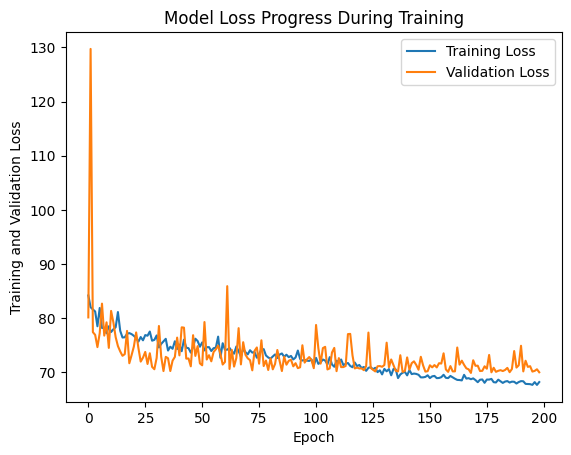

In [ ]:
# Plot loss vs epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:
# Test model accuracy
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)

while True:
    try:
        # Input data from the user
        loudness = -10.506
        duration_ms = 227093
        tempo = 102.617
        danceability = 0.371
        speechiness = 0.0281
        liveness = 0.104
        acousticness = 0.748
        valence = 0.165
        energy = 0.268

        # Create a feature vector from user inputs
        user_input = scaler.transform([[loudness, duration_ms, tempo, danceability, speechiness, liveness, acousticness, valence, energy]])

        # Predict the popularity using the model
        prediction = model.predict(user_input)

        # Display the predicted popularity
        print(f"Predicted Popularity: {prediction[0][0]}")

    except ValueError:
        print("Invalid input. Please enter numeric values for all features.")

    # Ask if the user wants to continue
    again = input("Do you want to predict another popularity value? (yes/no): ").strip().lower()
    if again != "yes":
        break

1/1 [==============================] - 0s 12ms/step
Predicted Popularity: 57.0833854675293


'liveness', 'acousticness', 'valence', 'energy

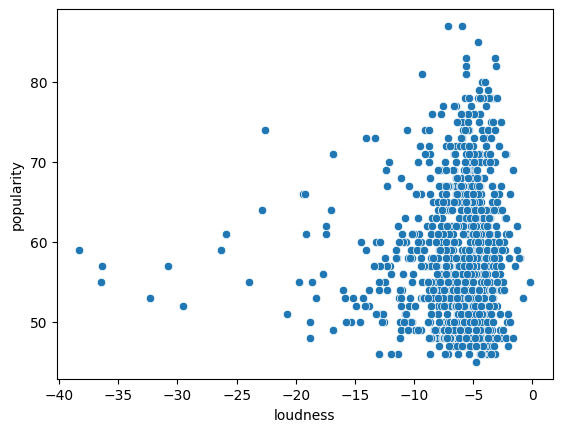

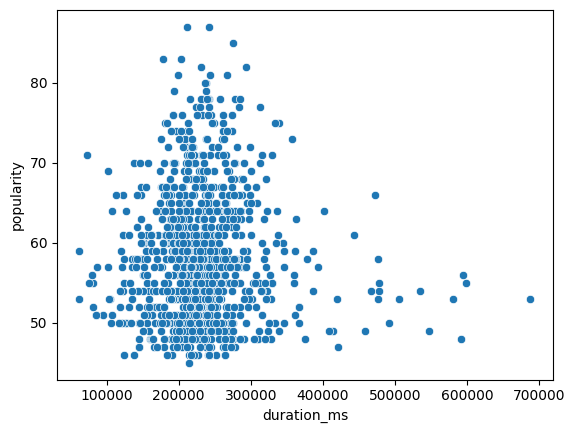

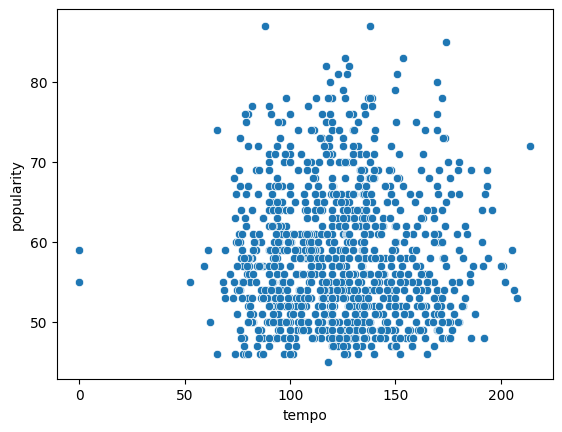

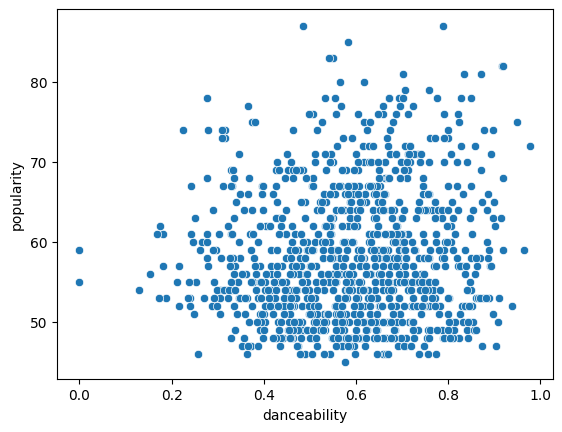

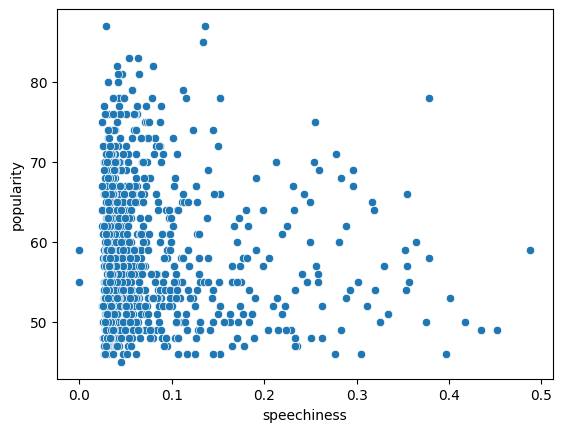

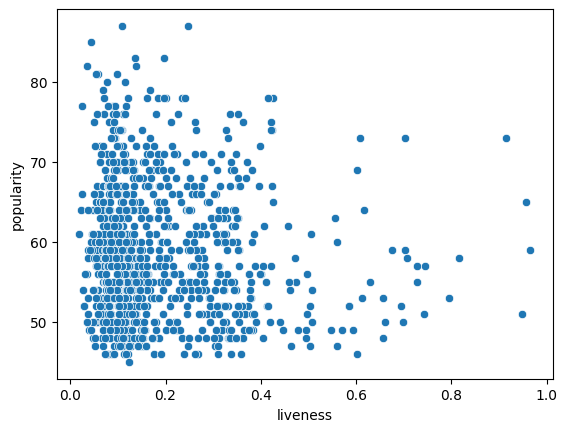

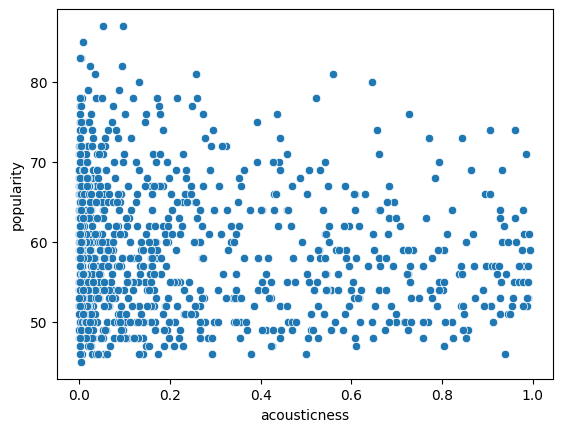

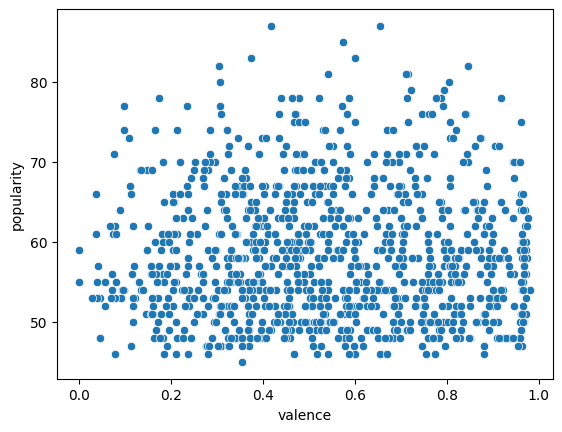

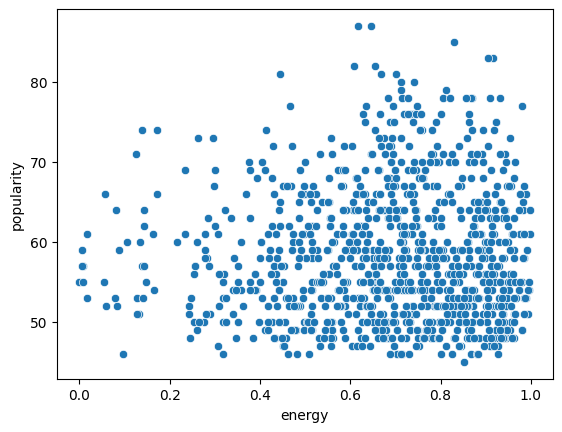

In [ ]:
# Graph popularity vs other features
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(f'{2008}.csv')
# Create a scatter plot
sns.scatterplot(x='loudness', y='popularity', data=df)
plt.show()
sns.scatterplot(x='duration_ms', y='popularity', data=df)
plt.show()
sns.scatterplot(x='tempo', y='popularity', data=df)
plt.show()
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.show()
sns.scatterplot(x='speechiness', y='popularity', data=df)
plt.show()
sns.scatterplot(x='liveness', y='popularity', data=df)
plt.show()
sns.scatterplot(x='acousticness', y='popularity', data=df)
plt.show()
sns.scatterplot(x='valence', y='popularity', data=df)
plt.show()
sns.scatterplot(x='energy', y='popularity', data=df)
plt.show()
